In [1]:
import pandas as pd
df = pd.read_csv("Bengaluru_House_Data.csv")

pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# **Data Cleaning**

## **"Bath" cleaning**

In [2]:
## Availability is not a determining factor in the price calculation

df = df.drop(['availability', 'society', 'area_type', 'balcony'], axis='columns')
print(f"nan values initially: \n{df.isna().sum()}")

df['bath'] = df['bath'].fillna( int(df['bath'].mean()))
print(f"\nnan values after averaging bath column: \n{df.isna().sum()}") 
df['size'].unique()


nan values initially: 
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

nan values after averaging bath column: 
location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## **"size" cleaning**

In [3]:
size_in_bhk = []
from nltk.tokenize import word_tokenize
for i in df['size']:
    if pd.isna(i): ### this helps in identifying that if theres any
                    #### nan value it must be set to 'bhk'
        size_in_bhk.append('NaN')
    else:    
        print ((word_tokenize(i)))
        print((word_tokenize(i)[0]))      #### SEE THIS NUMBER "COMING OUT AS TOKEN IS A STR NOT AN INT"
        size_in_bhk.append((word_tokenize(i)[0]))



['2', 'BHK']
2
['4', 'Bedroom']
4
['3', 'BHK']
3
['3', 'BHK']
3
['2', 'BHK']
2
['2', 'BHK']
2
['4', 'BHK']
4
['4', 'BHK']
4
['3', 'BHK']
3
['6', 'Bedroom']
6
['3', 'BHK']
3
['4', 'Bedroom']
4
['2', 'BHK']
2
['2', 'BHK']
2
['3', 'Bedroom']
3
['2', 'BHK']
2
['3', 'BHK']
3
['3', 'BHK']
3
['3', 'BHK']
3
['2', 'BHK']
2
['1', 'BHK']
1
['3', 'BHK']
3
['4', 'Bedroom']
4
['3', 'BHK']
3
['1', 'RK']
1
['3', 'BHK']
3
['2', 'BHK']
2
['3', 'BHK']
3
['2', 'BHK']
2
['3', 'BHK']
3
['4', 'BHK']
4
['3', 'BHK']
3
['3', 'BHK']
3
['3', 'BHK']
3
['3', 'BHK']
3
['2', 'BHK']
2
['2', 'BHK']
2
['3', 'BHK']
3
['3', 'BHK']
3
['2', 'BHK']
2
['2', 'BHK']
2
['3', 'BHK']
3
['1', 'BHK']
1
['1', 'Bedroom']
1
['2', 'BHK']
2
['8', 'Bedroom']
8
['2', 'BHK']
2
['2', 'BHK']
2
['2', 'Bedroom']
2
['2', 'BHK']
2
['2', 'BHK']
2
['3', 'BHK']
3
['3', 'BHK']
3
['2', 'BHK']
2
['3', 'BHK']
3
['2', 'BHK']
2
['4', 'Bedroom']
4
['2', 'BHK']
2
['6', 'Bedroom']
6
['2', 'BHK']
2
['3', 'Bedroom']
3
['2', 'BHK']
2
['4', 'Bedroom']
4
['2', 'B

In [4]:
df['size in bhk']= size_in_bhk
print(df['size in bhk'].unique())


## HERE we are printing all "NAN strings" with their index
for i,j in enumerate(df['size in bhk']):
    #print(f" {i}: {j}") ### this will print every element 
                        #### of the above selected dataframe

    if j == 'NaN':     
        print(f" {i}: {j}")

## replaing the "NAN string" with np.nan values        
import numpy as np
df['size in bhk'] = df['size in bhk'].replace('NaN',np.nan )


['2' '4' '3' '6' '1' '8' '7' '5' '11' '9' 'NaN' '27' '10' '19' '16' '43'
 '14' '12' '13' '18']
 579: NaN
 1775: NaN
 2264: NaN
 2809: NaN
 2862: NaN
 5333: NaN
 6423: NaN
 6636: NaN
 6719: NaN
 7680: NaN
 8306: NaN
 8565: NaN
 8703: NaN
 10634: NaN
 11019: NaN
 11569: NaN


In [5]:
print(f"nan values after replacing the NAN string with np.nan values : \n{df.isna().sum()}")

df['size in bhk'] = df['size in bhk'].astype(float)  # NOW SINCE THE ELEMENTS IN THIS COL ARE "numbers as STRING" and "NAN values", it must be set to float
df['size in bhk'] = df['size in bhk'].fillna( int(df['size in bhk'].mean()))

df = df.drop(['size'], axis= 'columns')
print(f"\nnan values after filling the NAN with avg : \n{df.isna().sum()}")

df

nan values after replacing the NAN string with np.nan values : 
location        1
size           16
total_sqft      0
bath            0
price           0
size in bhk    16
dtype: int64

nan values after filling the NAN with avg : 
location       1
total_sqft     0
bath           0
price          0
size in bhk    0
dtype: int64


,location,total_sqft,bath,price,size in bhk
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5.0
13316,Richards Town,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4689,4.0,488.00,4.0


In [6]:
import sys
np.set_printoptions(threshold=sys.maxsize)

print(f"\nunique loaction : \n{df['location'].unique()}")
print(f"\n\nunique total_sqft  :\n{df['total_sqft'].unique()}")
print(f"\n\nunique size in bhk  :\n{df['size in bhk'].unique()}")
print(f"\n\nunique bath  :\n{df['bath'].unique()}")
print(f"\n\nunqique price  :\n{df['price'].unique()}")




unique loaction : 
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur' 'Whitefield' 'Old Airport Road'
 'Rajaji Nagar' 'Marathahalli' 'Gandhi Bazar' '7th Phase JP Nagar'
 'Gottigere' 'Sarjapur' 'Mysore Road' 'Bisuvanahalli'
 'Raja Rajeshwari Nagar' 'Ramakrishnappa Layout' 'Manayata Tech Park'
 'Kengeri' 'Binny Pete' 'Thanisandra' 'Bellandur' ' Thanisandra'
 'Mangammanapalya' 'Electronic City' 'Ramagondanahalli' 'Yelahanka'
 'Hebbal' 'Kasturi Nagar' 'Kanakpura Road' 'Electronics City Phase 1'
 'Kundalahalli' 'Chikkalasandra' 'Murugeshpalya' 'Sarjapur  Road'
 'Ganga Nagar' 'HSR Layout' 'Doddathoguru' 'KR Puram' 'Himagiri Meadows'
 'Adarsh Nagar' 'Bhoganhalli' 'Lakshminarayana Pura' 'Begur Road'
 'Devanahalli' 'Govindaraja Nagar Ward' 'Tharabanahalli' 'Varthur'
 'Bommanahalli' 'Gunjur' 'Devarachikkanahalli' 'Double Road' 'Hegde Nagar'
 'Haralur Road' 'Hennur Road' 'Kothannur' 'Kalena Agrahara'
 'Cholanayakanahalli' 'Kaval Byrasandra' 'ISRO Layout

## **"total_sqft" cleaning**

In [7]:
### now since "total_sqft" column has a range and some values in diffrent units
## for ranges we can take the averge and for different units prolly we can drop that row

def num_is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(num_is_float)]

,location,total_sqft,bath,price,size in bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4.0
56,Devanahalli,3010 - 3410,2.0,192.000,4.0
81,Hennur Road,2957 - 3450,2.0,224.500,4.0
122,Hebbal,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2.0
...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,122.000,3.0
13059,Harlur,1200 - 1470,2.0,72.760,2.0
13240,Devanahalli,1020 - 1130,2.0,52.570,1.0
13265,Hoodi,1133 - 1384,2.0,59.135,2.0


In [8]:

def sqft_to_num_with_avg(x):
    tokenized = word_tokenize(x)
    if (tokenized) == 3:
        return float((float(tokenized[0]) + float(tokenized[2]))/2)
    
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(sqft_to_num_with_avg)

print(f"after converting ranges and jargons in 'total_sqft': \n{df.isna().sum()}")
df

after converting ranges and jargons in 'total_sqft': 
location         1
total_sqft     247
bath             0
price            0
size in bhk      0
dtype: int64


,location,total_sqft,bath,price,size in bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0
13316,Richards Town,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0


## **str("Location") cleaning**

In [9]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
print(f" total number of unique locations in 'locations' column :{len(df['location'].unique())}")
df

 total number of unique locations in 'locations' column :1306


,location,total_sqft,bath,price,size in bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


### **use of `.dropna`**, **`lambda x:` and `.strip()`**

In [10]:
## now since there are lots of names in the location column
## but there will be many with frequency 1 or 2 .

## usually we deal with text varibles as encoder, counvectorizer, dummy varibales
## but for this we gonna use 'others' tag


# location has 1 nan value we can drop it since we have lot a data
df = df.dropna(subset=['location'])
print(df.isna().sum())

# need to strip the trailing and ending spaces in the text datas
df['location'] = df['location'].apply(lambda x: x.strip())
df

location            0
total_sqft        247
bath                0
price               0
size in bhk         0
price_per_sqft    247
dtype: int64


C:\Users\mayank ghritiahre\AppData\Local\Temp\ipykernel_20172\3440397656.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: x.strip())


,location,total_sqft,bath,price,size in bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


### **use of `.groupby`**

In [11]:
location_stats = df.groupby(by= ['location'])['location'].count().sort_values(ascending= False)
print(f"location stats: {location_stats}")

print(f"\n\nlocation stats for less tha 10:{location_stats[location_stats<=10]}")
location_stats_less_than_10 = location_stats[location_stats<=10]


location stats: location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64


location stats for less tha 10:location
Sadashiva Nagar          10
Nagappa Reddy Layout     10
Nagadevanahalli          10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1053, dtype: int64


In [12]:
print((f" unique value before 'other' application  :{len(df['location'].unique())}"))
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print((f" unique value after 'other' application  :{len(df['location'].unique())}"))
df[df['location'] == 'other']

 unique value before 'other' application  :1294
 unique value after 'other' application  :242


C:\Users\mayank ghritiahre\AppData\Local\Temp\ipykernel_20172\3721698338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


,location,total_sqft,bath,price,size in bhk,price_per_sqft
9,other,1020.0,6.0,370.00,6.0,36274.509804
18,other,2770.0,4.0,290.00,3.0,10469.314079
19,other,1100.0,2.0,48.00,2.0,4363.636364
25,other,1250.0,3.0,56.00,3.0,4480.000000
42,other,600.0,1.0,38.00,1.0,6333.333333
...,...,...,...,...,...,...
13291,other,812.0,1.0,26.00,1.0,3201.970443
13292,other,1440.0,2.0,63.93,3.0,4439.583333
13302,other,1075.0,2.0,48.00,2.0,4465.116279
13306,other,1200.0,5.0,325.00,4.0,27083.333333


## **"size in bhk" and "total_sqft" cleaning**

In [13]:
## now there might be some faulty values based on the number of rooms and sqft mentioned
## for exapmle if sqft is very very large its almost presumtious that number of room will be atleast >3

## which means we need to take of care of sqft per rooms

## for threhold its around 300 sqft per room
## which means that each room must be have >= 300sqft
df[df['total_sqft']/df['size in bhk'] < 300]


## gives a dataset of lenghth 744 where is has faulty data
## which house which have faulty data wehere area per room is <300
### this means that these faulty values must be removed

,location,total_sqft,bath,price,size in bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8.0,6296.296296
70,other,500.0,3.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7.0,15571.428571
13279,other,1200.0,5.0,130.0,6.0,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5.0,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5.0,9043.927649


In [14]:
## NOTE: here we are taking those values in df who are not faulty 
## that means that faulty values have been negated to unfaulty values
## and these values have been updated in the dataframe df
## (indirectly faulty values have been removed from df)
df = df[ ~(df['total_sqft']/df['size in bhk'] < 300)]
df 

,location,total_sqft,bath,price,size in bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,other,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


## **"price per sqft" cleaning ( outlier removal)**

In [15]:
df['price_per_sqft'].describe()

## max  176470.588235, min  267.829813  which is very unrealistic, i.e outliers

count     12328.000000
mean       6322.553614
std        4187.640247
min         267.829813
25%        4206.982998
50%        5300.000000
75%        6938.556538
max      176470.588235
Name: price_per_sqft, dtype: float64

In [16]:
## removing outliers
def outlier_removal(df):
    df_ouput = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        standard_deviation = np.std(subdf['price_per_sqft'])
        ouliner_removed_df  =  subdf[(subdf['price_per_sqft']>(mean-standard_deviation)) & (subdf['price_per_sqft']<(mean+standard_deviation))]

        ## concat works just like appending values in empty array
        df_ouput = pd.concat([df_ouput, ouliner_removed_df], ignore_index= True)
    return df_ouput
    
df = outlier_removal(df)
df

,location,total_sqft,bath,price,size in bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...
10148,other,1353.0,2.0,110.00,2.0,8130.081301
10149,other,812.0,1.0,26.00,1.0,3201.970443
10150,other,1440.0,2.0,63.93,3.0,4439.583333
10151,other,1075.0,2.0,48.00,2.0,4465.116279


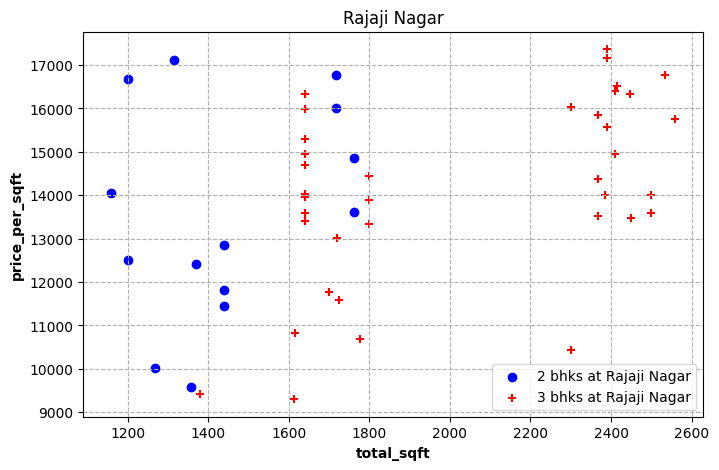

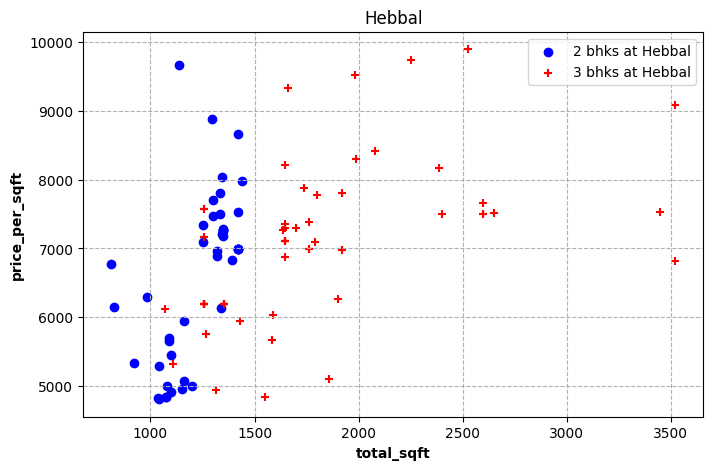

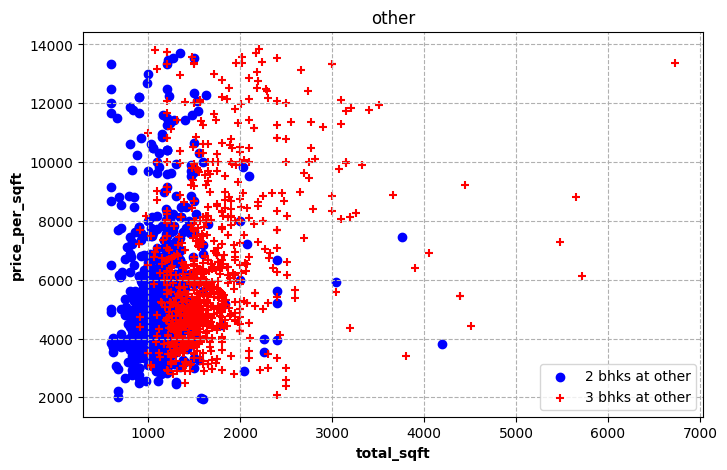

In [17]:
import matplotlib.pyplot as plt
def scatter_plot_2_3_bhk_with_location(df,location):
    plt.figure(figsize= (8,5), dpi=100)
    bhk2 = df[(df['location'] == location) & (df['size in bhk']==2)]
    bhk3 = df[(df['location'] == location) & (df['size in bhk']==3)]
    plt.scatter( bhk2['total_sqft'] , bhk2['price_per_sqft'], color = 'blue', marker= 'o', label = f"2 bhks at {location}" )
    plt.scatter( bhk3['total_sqft'] , bhk3['price_per_sqft'], color = 'red', marker= '+', label = f"3 bhks at {location}" )
    plt.xlabel('total_sqft', weight = 'bold')
    plt.ylabel('price_per_sqft', weight ='bold')
    plt.title(f"{location}")
    plt.grid(True,linestyle='--')
    plt.legend()
    plt.show()

scatter_plot_2_3_bhk_with_location(df,"Rajaji Nagar")
scatter_plot_2_3_bhk_with_location(df,"Hebbal")
scatter_plot_2_3_bhk_with_location(df,"other")

## **'BHK' cleaning** **(BHK outliers removal)**

**we should remmove properties where for the same location
price of 3BHK is less than 2BHK(withsame sqft area).**

```python
{ '1':{  
    'mean': 4000,     
    'std' : 2000,      
    'count': 34    
},  
   '2': {  
    'mean': 4300,  
    'std' : 2300,  
    'count': 22  
   }  
}  

```
**now we can remove those 2BHK apartments whose `price_per_sqft` is less than mean `price_per_sqft` of 1BHK**

(7227, 6)


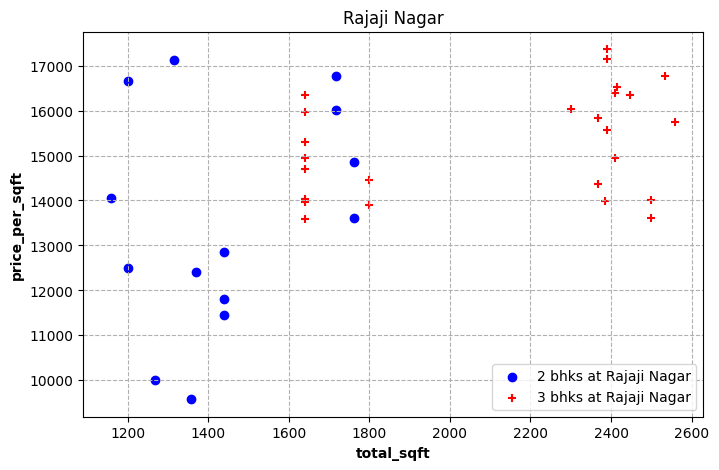

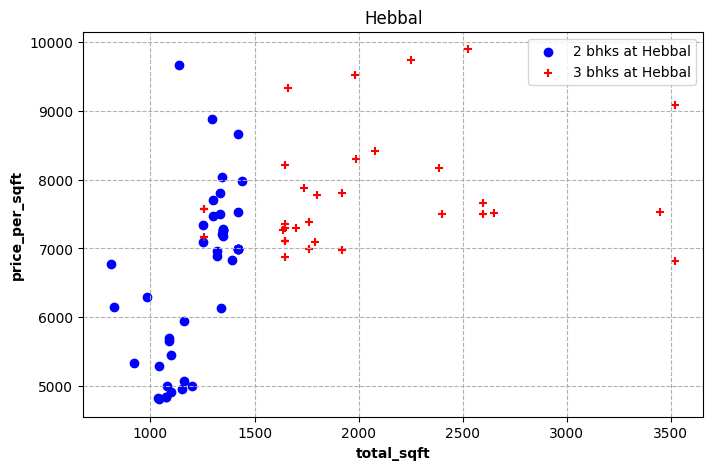

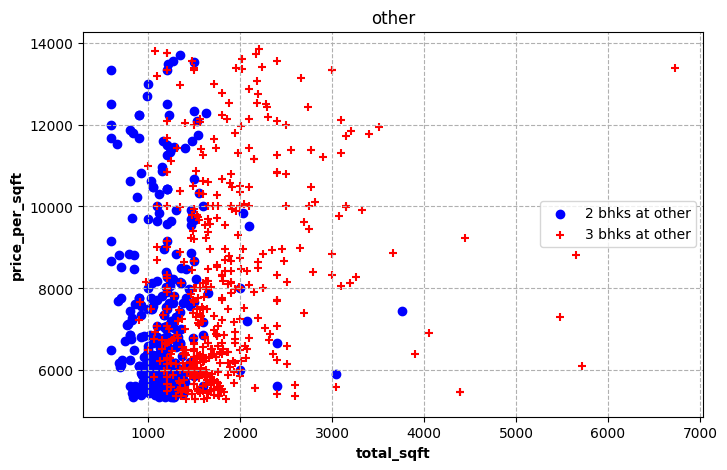

In [18]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats= {}
        for bhk,bhk_df in location_df.groupby('size in bhk'):
            bhk_stats[bhk]= {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std'  : np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size in bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']< (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis= 'index')

df = remove_bhk_outliers(df)
print(df.shape)
scatter_plot_2_3_bhk_with_location(df,"Rajaji Nagar")
scatter_plot_2_3_bhk_with_location(df,"Hebbal")
scatter_plot_2_3_bhk_with_location(df,"other")

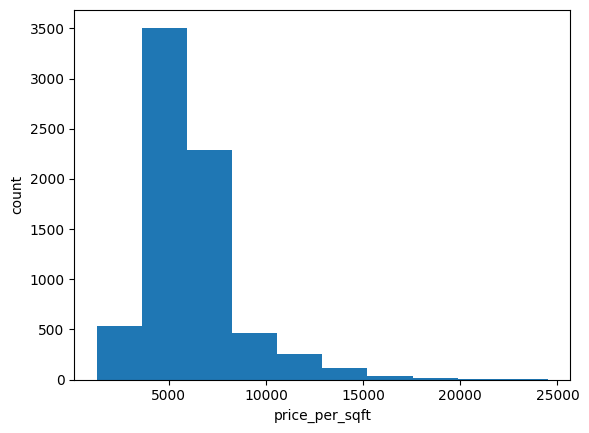

In [19]:
plt.hist(df['price_per_sqft'])
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

# **Model Building**

In [20]:
# price per sqft was required only for the data cleaning process
print(df['location'].unique())
print(f"\ntotal number of unique locations :{len(df['location'].unique())}")
df = df.drop('price_per_sqft', axis= 'columns')
df

['1st Block Jayanagar' '1st Phase JP Nagar' '2nd Phase Judicial Layout'
 '2nd Stage Nagarbhavi' '5th Block Hbr Layout' '5th Phase JP Nagar'
 '6th Phase JP Nagar' '7th Phase JP Nagar' '8th Phase JP Nagar'
 '9th Phase JP Nagar' 'AECS Layout' 'Abbigere' 'Akshaya Nagar'
 'Ambalipura' 'Ambedkar Nagar' 'Amruthahalli' 'Anandapura' 'Ananth Nagar'
 'Anekal' 'Anjanapura' 'Ardendale' 'Arekere' 'Attibele' 'BEML Layout'
 'BTM 2nd Stage' 'BTM Layout' 'Babusapalaya' 'Badavala Nagar' 'Balagere'
 'Banashankari' 'Banashankari Stage II' 'Banashankari Stage III'
 'Banashankari Stage V' 'Banashankari Stage VI' 'Banaswadi'
 'Banjara Layout' 'Bannerghatta' 'Bannerghatta Road' 'Basavangudi'
 'Basaveshwara Nagar' 'Battarahalli' 'Begur' 'Begur Road' 'Bellandur'
 'Benson Town' 'Bharathi Nagar' 'Bhoganhalli' 'Billekahalli' 'Binny Pete'
 'Bisuvanahalli' 'Bommanahalli' 'Bommasandra'
 'Bommasandra Industrial Area' 'Bommenahalli' 'Brookefield' 'Budigere'
 'CV Raman Nagar' 'Chamrajpet' 'Chandapura' 'Channasandra'
 'Ch

,location,total_sqft,bath,price,size in bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...
10144,other,1200.0,2.0,70.0,2.0
10145,other,1800.0,1.0,200.0,1.0
10148,other,1353.0,2.0,110.0,2.0
10149,other,812.0,1.0,26.0,1.0


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['location_encoded'] = encoder.fit_transform(df['location'])
df

,location,total_sqft,bath,price,size in bhk,location_encoded
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,0
...,...,...,...,...,...,...
10144,other,1200.0,2.0,70.0,2.0,241
10145,other,1800.0,1.0,200.0,1.0,241
10148,other,1353.0,2.0,110.0,2.0,241
10149,other,812.0,1.0,26.0,1.0,241


In [22]:

x = df.drop(['location', 'price'], axis='columns')
y = df['price']

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

def best_model(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False],
                'n_jobs' : [30, 100]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 2, 10],
                'selection': ['cyclic','random']  
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'max_depth': [10, 20],  
                'min_samples_split': [2, 5]  
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100],  
                'max_features': ['sqrt'],  
                'max_depth': [10, 20],  
                'min_samples_split': [2, 5]
            }
        }
    }

    scores = []
    k_fold_cross_validation = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        grid_search = GridSearchCV(config['model'], config['params'], cv=k_fold_cross_validation, return_train_score=False, error_score='raise', n_jobs=-1)
        grid_search.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })

    return pd.DataFrame(scores)


best_model(x, y)



,model,best_score,best_params
0,linear_regression,0.713753,"{'fit_intercept': True, 'n_jobs': 30, 'positiv..."
1,lasso,0.713806,"{'alpha': 10, 'selection': 'cyclic'}"
2,decision_tree,0.538189,"{'criterion': 'squared_error', 'max_depth': 10..."
3,random_forest,0.750399,"{'max_depth': 20, 'max_features': 'sqrt', 'min..."


In [23]:
## random forest is the best

### scoring with test test split
model = RandomForestRegressor(n_estimators=100,max_depth=20, max_features='sqrt', min_samples_split= 20 )
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

###scoring with cross val score
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state=0)
print(cross_val_score(model, x, y, cv=cv).mean())



0.7557708258745459
0.7332445481546506


## **Prediction**

In [24]:
df

,location,total_sqft,bath,price,size in bhk,location_encoded
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,0
...,...,...,...,...,...,...
10144,other,1200.0,2.0,70.0,2.0,241
10145,other,1800.0,1.0,200.0,1.0,241
10148,other,1353.0,2.0,110.0,2.0,241
10149,other,812.0,1.0,26.0,1.0,241


In [25]:
model.predict([[1075.0, 2.0, 2.0, 241]])
#10151:[other	total_sqft:1075.0, bath:2.0	, price:48.00, size_in_bhk:2.0,	location_encoded:241]

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([63.85657193])

In [26]:
for i in df['location_encoded']:
    print((df['location'].unique())[i]) 


1st Block Jayanagar
1st Block Jayanagar
1st Block Jayanagar
1st Block Jayanagar
1st Block Jayanagar
1st Block Jayanagar
1st Block Jayanagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
1st Phase JP Nagar
2nd Phase Judicial Layout
2nd Phase Judicial Layout
2nd Phase Judicial Layout
2nd Phase Judicial Layout
2nd Phase Judicial Layout
2nd Phase Judicial Layout
2nd Phase Judicial Layout
2nd Phase Judicial Layout
2nd Stage Nagarbhavi
2nd Stage Nagarbhavi
2nd Stage Nagarbhavi
2nd Stage Nagarbhavi
2nd Stage Nagarbhavi
2nd Stage Nagarbhavi
5th Block Hbr Layout
5th Block Hbr Layout
5th Block Hbr Layout
5th Block Hbr Layout
5th Block Hbr Layout
5th Block Hbr Layout
5th Phase JP Nagar
5th Phase JP Nagar
5th Phase JP Nagar
5th Phase JP Nagar
5th Phase JP Nagar
5

In [27]:
print(np.zeros(len(x.columns)))
print(x.columns)
print(np.where(x.columns == 'location_encoded')[0][0])

[0. 0. 0. 0.]
Index(['total_sqft', 'bath', 'size in bhk', 'location_encoded'], dtype='object')
3


In [28]:
def predict_price(location, sqft, bath, bhk):
    
    try:
        loc_index = np.where(x.columns == 'location_encoded')[0][0]
        loc_encoded_value = df[df['location'] == location]['location_encoded'].values[0]
    except IndexError:
        return "Location not found in the dataset"

    
    X = np.zeros(len(x.columns))
    ## so it works like we create a dummy array of zeros
    # in this case [0, 0, 0, 0]

    # now the values in the variable is updated to out inputs vaiables
    # i.e
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    
    #[sqft, bath, bhk, 0]
    if loc_index >= 0:
        X[loc_index] = loc_encoded_value  
    
    print(X)
    return model.predict([X])[0]


predict_price('Indira Nagar', 1000, 2, 3)
predict_price('1st Phase JP Nagar', 1000, 7, 2)

[1000.    2.    3.  113.]
[1000.    7.    2.    1.]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


117.4950054406515

In [29]:
print(predict_price('1st Phase JP Nagar', 1000, 3, 3))
print(predict_price('1st Phase JP Nagar', 1000, 3, 2))

[1000.    3.    3.    1.]
78.6207819246421
[1000.    3.    2.    1.]
83.41753185136687


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

import json
columns = { 'data_columns': [col.lower() for col in x.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

locations = { 'locations_data': [col.lower() for col in df['location'].unique()]}
with open("locations.json","w") as f:
    f.write(json.dumps(locations))